In [38]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
data = pd.read_csv('final!!!.csv', thousands=',', index_col=[0,1], encoding = "EUC-KR")
data_removed = data[data['total_equity'] > 10000000]
data_removed = data_removed[data_removed['sales_growth'] != np.inf]
data_removed['lsize'] = np.log(data_removed.groupby(level=0).shift(1)['sales'])
data_removed.dropna(axis=0, how='any', inplace=True)

In [40]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
dep = ' + '.join(['lsize', 'stdebt_ratio', 'sales_growth'])

query1 = 'roe ~ ' + dep
print(query1)
model = smf.ols(query1, data=data_removed).fit()
model.summary()

roe ~ lsize + stdebt_ratio + sales_growth


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roe   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     51.80
Date:                Tue, 03 Apr 2018   Prob (F-statistic):           2.87e-33
Time:                        00:11:19   Log-Likelihood:                -6027.5
No. Observations:               12817   AIC:                         1.206e+04
Df Residuals:                   12813   BIC:                         1.209e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0783      0.042      1.869      0.062      -0.004       0.161
lsize            0.0035      0.002      1.535      0.125      -0.001       0.008
stdebt_ratio    -0.2847      0.023    -12.361      0.000      -0.330      -0.240
sales_growth     0.0004      0.001      0.369      0.712      -0.002       0.003
==============================================================================
Omnibus:                    35711.623   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3129054858.798
Skew:                         -35.488   Prob(JB):                         0.00
Kurtosis:                    2422.537   Cond. No.                         235.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.stats as stats

influence = model.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance

data_removed['Cook_D'] = c
data_removed['Cook_D_Pval'] = p
data_removed['Cook_D_over'] = np.where(data_removed['Cook_D'] > 2/len(c), 1, 0)

trans_data = data_removed[data_removed['Cook_D_over'] == 0]

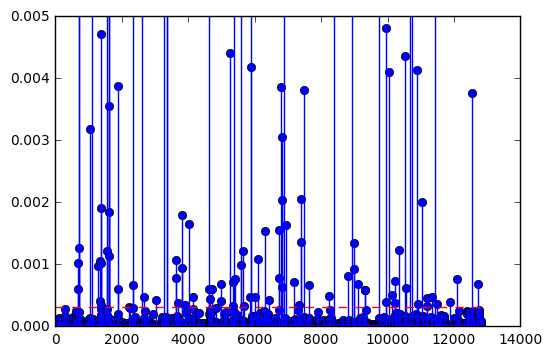

In [8]:
plt.stem(data_removed['Cook_D'],marker='.')
plt.ylim(0,0.005)
plt.hold
plt.plot([0,len(c)],[4/len(c),4/len(c)], 'r--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000160E0062E48>]], dtype=object)

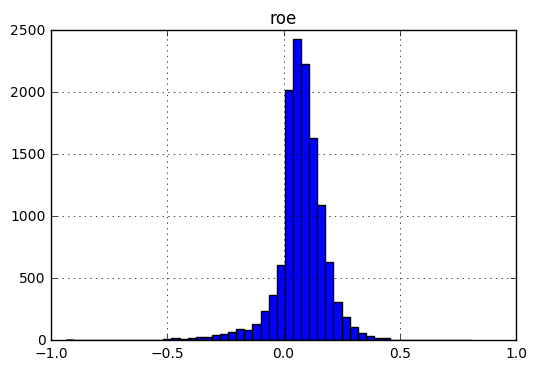

In [9]:
trans_data.hist(column='roe',bins=50)

In [10]:
def ols_res(df, xcols,  ycol):
    return sm.OLS(df[ycol], df[xcols]).fit().predict()


Then, you can use groupby and apply like this

df.grouby('grp').apply(ols_res, xcols=['x1', 'x2'], ycol='y')
Or

df.grouby('grp').apply(ols_res, ['x1', 'x2'], 'y')


ep = ' + '.join(['lsize', 'stdebt_ratio', 'sales_growth'])

query1 = 'roe ~ ' + dep
print(query1)
model2 = smf.ols(query1, data=trans_data).fit()
model2.summary()

roe ~ lsize + stdebt_ratio + sales_growth


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    roe   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     74.11
Date:                Mon, 02 Apr 2018   Prob (F-statistic):           1.63e-47
Time:                        23:12:22   Log-Likelihood:                 10101.
No. Observations:               12638   AIC:                        -2.019e+04
Df Residuals:                   12634   BIC:                        -2.016e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0013      0.012      0.105      0.916      -0.022       0.025
lsize            0.0050      0.001      7.821      0.000       0.004       0.006
stdebt_ratio    -0.0822      0.007    -12.281      0.000      -0.095      -0.069
sales_growth     0.0059      0.001      7.820      0.000       0.004       0.007
==============================================================================
Omnibus:                     3550.366   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31184.324
Skew:                          -1.097   Prob(JB):                         0.00
Kurtosis:                      10.376   Cond. No.                         236.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

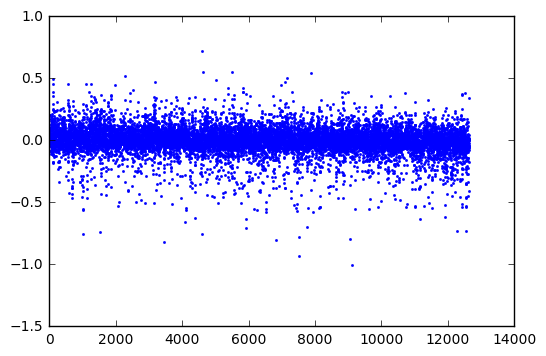

In [11]:
plt.plot(model2.resid.values,'b.', markersize=3)

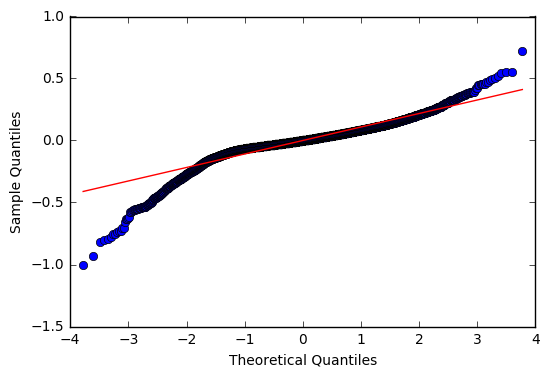

In [12]:
res = model2.resid # residuals
fig = sm.qqplot(res,line='s')

In [47]:
from linearmodels.panel import PanelOLS, compare

X = trans_data.loc[:,['lsize', 'stdebt_ratio', 'sales_growth']]
X = sm.add_constant(X)
y = trans_data[['roe']]
mod1 = PanelOLS(y, X)
res1 = mod1.fit(cov_type='unadjusted')

X = trans_data.loc[:,['lsize', 'ltdebt_ratio', 'sales_growth']]
X = sm.add_constant(X)
y = trans_data[['roe']]
mod2 = PanelOLS(y, X)
res2 = mod2.fit(cov_type='unadjusted')

X = trans_data.loc[:,['lsize',  'stdebt_ratio', 'ltdebt_ratio', 'sales_growth']]
X = sm.add_constant(X)
y = trans_data[['roe']]
mod3 = PanelOLS(y, X)
res3 = mod3.fit(cov_type='unadjusted')

X = trans_data.loc[:,['lsize',  'stdebt_ratio', 'ltdebt_ratio', 'sales_growth', 
                        'cost_of_goods_sold_ratio', 'labor_cost_ratio','advertisement_cost_ratio',
                        'selling_cost_ratio','administrative cost_ratio']]
X = sm.add_constant(X)
y = trans_data[['roe']]
mod4 = PanelOLS(y, X)
res4 = mod4.fit(cov_type='unadjusted')

X = trans_data.loc[:,['lsize',  'stdebt_ratio', 'ltdebt_ratio', 'sales_growth', 
                        'cost_of_goods_sold_ratio', 'labor_cost_ratio','advertisement_cost_ratio',
                        'selling_cost_ratio','administrative cost_ratio']]
X = sm.add_constant(X)
y = trans_data[['roe']]
mod5 = PanelOLS(y, X, time_effects=True,entity_effects=True)
res5 = mod5.fit(cov_type='unadjusted')

strings = ' + '.join(['lsize', 'stdebt_ratio', 'ltdebt_ratio', 'sales_growth', 
                        'cost_of_goods_sold_ratio', 'labor_cost_ratio','advertisement_cost_ratio',
                        'selling_cost_ratio', 'administrative_cost_ratio','EntityEffect + TimeEffect'])
print(strings)
mod6 = PanelOLS.from_formula('roe ~ 1+ ' + strings, trans_data)
# mod6 = PanelOLS(y, X, time_effects=True,entity_effects=True)
res6 = mod6.fit(cov_type='unadjusted')

result = compare({'STD':res1,'LTD':res2,'TD':res3,
                  'COST':res4, 'EFFECT':res5, 'indummy': res6})
result.summary

lsize + stdebt_ratio + ltdebt_ratio + sales_growth + cost_of_goods_sold_ratio + labor_cost_ratio + advertisement_cost_ratio + selling_cost_ratio + administrative_cost_ratio + EntityEffect + TimeEffect


PatsyError: Error evaluating factor: NameError: name 'EntityEffect' is not defined
    roe ~ 0 +  1+ lsize + stdebt_ratio + ltdebt_ratio + sales_growth + cost_of_goods_sold_ratio + labor_cost_ratio + advertisement_cost_ratio + selling_cost_ratio + administrative_cost_ratio + EntityEffect + TimeEffect
                                                                                                                                                                                                 ^^^^^^^^^^^^

In [21]:
result.pvalues

,COST,EFFECT,LTD,STD,TD
administrative cost_ratio,0.000000e+00,0.000000e+00,NaN,NaN,NaN
advertisement_cost_ratio,2.896226e-09,3.753207e-06,NaN,NaN,NaN
const,0.000000e+00,2.046310e-10,3.108597e-04,9.160040e-01,0.000003
cost_of_goods_sold_ratio,0.000000e+00,0.000000e+00,NaN,NaN,NaN
labor_cost_ratio,0.000000e+00,1.676437e-12,NaN,NaN,NaN
lsize,0.000000e+00,7.593783e-07,0.000000e+00,5.773160e-15,0.000000
ltdebt_ratio,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000
sales_growth,3.449500e-09,1.092103e-08,1.221245e-14,5.551115e-15,0.000000
selling_cost_ratio,0.000000e+00,0.000000e+00,NaN,NaN,NaN
stdebt_ratio,5.587248e-02,2.081905e-06,NaN,0.000000e+00,0.000000


In [15]:
pd.unique(data_removed['sector'])

array(['IT', '의료', '경기소비재', '소재', '산업재', '유틸리티', '에너지', '필수소비재', '통신서비스',
       '금융'], dtype=object)

In [23]:
res_dict = {}
for sector in pd.unique(trans_data['sector']):
    data_IT = trans_data[trans_data['sector'] == sector]

    X = data_IT.loc[:,['lsize',  'stdebt_ratio', 'ltdebt_ratio', 'sales_growth', 
                            'cost_of_goods_sold_ratio', 'labor_cost_ratio','advertisement_cost_ratio',
                            'selling_cost_ratio','administrative cost_ratio']]
    X = sm.add_constant(X)
    y = data_IT[['roe']]
    mod = PanelOLS(y, X, time_effects=True, entity_effects=True)
    res = mod.fit(cov_type='unadjusted')

    res_dict[sector] = res

result = compare(res_dict)
result.summary

,IT,경기소비재,금융,산업재,소재,에너지,유틸리티,의료,통신서비스,필수소비재
Dep. Variable,roe,roe,roe,roe,roe,roe,roe,roe,roe,roe
Estimator,PanelOLS,PanelOLS,PanelOLS,PanelOLS,PanelOLS,PanelOLS,PanelOLS,PanelOLS,PanelOLS,PanelOLS
No. Observations,2264,2894,30,2605,2181,270,206,1132,31,1025
Cov. Est.,Unadjusted,Unadjusted,Unadjusted,Unadjusted,Unadjusted,Unadjusted,Unadjusted,Unadjusted,Unadjusted,Unadjusted
R-squared,0.1781,0.1717,0.8692,0.2587,0.2823,0.1764,0.3507,0.3873,0.7646,0.1713
R-Squared (Within),0.1885,0.1718,-1478.1,0.2656,0.2847,0.1426,0.1236,0.3277,-2.4167,0.1642
R-Squared (Between),0.3140,0.3225,-2.585e+04,0.3365,0.1268,0.3136,0.2741,0.3039,-302.87,-0.2320
R-Squared (Overall),0.2219,0.2376,-1760.4,0.2544,0.2564,0.1251,-0.4095,0.2468,-129.36,0.0641
F-statistic,45.556,58.872,0.7381,89.512,85.278,5.0915,10.024,68.975,1.0828,20.673
P-value (F-stat),0.0000,0.0000,0.7256,0.0000,0.0000,0.0000,0.0000,0.0000,0.5320,0.0000


In [24]:
result.pvalues

,IT,경기소비재,금융,산업재,소재,에너지,유틸리티,의료,통신서비스,필수소비재
const,7.173824e-05,1.217841e-05,0.616548,1.678879e-12,4.762701e-11,5.293826e-01,0.136972,8.504787e-01,0.854708,1.882298e-04
lsize,3.835806e-01,1.098740e-01,0.618408,1.888859e-01,1.936752e-02,1.425879e-02,0.019015,1.890783e-08,0.867791,5.771042e-01
stdebt_ratio,1.008446e-03,7.804872e-01,0.594340,2.558123e-01,3.544454e-06,5.165811e-01,0.447431,3.087817e-01,0.827006,1.391639e-01
ltdebt_ratio,7.069462e-08,2.913751e-06,0.621178,2.222886e-06,2.440894e-02,1.493298e-01,0.001962,1.033162e-02,0.783375,4.682010e-11
sales_growth,3.818567e-03,6.181959e-01,0.622902,7.745899e-05,2.226024e-03,1.038498e-01,0.219829,7.953349e-11,0.811681,6.185589e-01
cost_of_goods_sold_ratio,0.000000e+00,0.000000e+00,0.800189,0.000000e+00,0.000000e+00,4.067411e-09,0.001182,0.000000e+00,0.959333,0.000000e+00
labor_cost_ratio,7.912974e-03,2.220446e-16,0.583885,7.048553e-10,1.732459e-11,1.375926e-01,0.047396,0.000000e+00,0.433011,2.600781e-03
advertisement_cost_ratio,3.939126e-01,2.130218e-03,0.677395,1.111366e-01,7.338652e-01,1.998549e-01,0.333136,4.153451e-05,0.596510,6.668559e-01
selling_cost_ratio,1.232348e-13,0.000000e+00,0.562874,0.000000e+00,1.556533e-13,1.421163e-01,0.979930,0.000000e+00,0.801956,2.560840e-12
administrative cost_ratio,1.422125e-05,6.727952e-13,0.664565,1.110223e-15,8.836265e-11,5.256784e-02,0.779197,0.000000e+00,0.586425,2.845463e-05


In [52]:
trans_data[trans_data['advertisement_cost'] <0]

,,total_assets,total_liability,shorterm_debt,longterm_debt,total_equity,sales,cost_of_goods_sold,labor_cost,advertisement_cost,selling_cost,...,cost_of_goods_sold_ratio,labor_cost_ratio,advertisement_cost_ratio,selling_cost_ratio,administrative cost_ratio,sector,lsize,Cook_D,Cook_D_Pval,Cook_D_over
code,year,,,,,,,,,,,,,,,,,,,,,
A067280,2016,108376665.0,28067950.0,28030477.0,2310591.0,78035597.0,186478433.0,118397587.0,34460248.0,-37062.0,448257.0,...,0.634913,0.184795,-0.000199,0.002404,0.047175,경기소비재,18.725039,0.000001,1.0,0


In [25]:
trans_data.describe().to_csv('summarystat.csv')

In [800]:
import statsmodels.graphics.api as smg
from statsmodels.stats.outliers_influence import variance_inflation_factor


data2 = trans_data[['stdebt_ratio', 'ltdebt_ratio', 'sales_growth', 
                            'cost_of_goods_sold_ratio', 'labor_cost_ratio','advertisement_cost_ratio',
                            'selling_cost_ratio','administrative cost_ratio']]
data2 = data2.astype(float)
corr_table = data2.corr('pearson')
corr_table

,stdebt_ratio,ltdebt_ratio,sales_growth,cost_of_goods_sold_ratio,labor_cost_ratio,advertisement_cost_ratio,selling_cost_ratio,administrative cost_ratio
stdebt_ratio,1.000000,0.105042,0.040592,0.274446,-0.206137,-0.094899,-0.015673,-0.123039
ltdebt_ratio,0.105042,1.000000,0.008344,0.116972,-0.085198,-0.045295,-0.028650,-0.027807
sales_growth,0.040592,0.008344,1.000000,-0.006403,-0.034979,0.003328,-0.012554,-0.024574
cost_of_goods_sold_ratio,0.274446,0.116972,-0.006403,1.000000,-0.594113,-0.573959,-0.368958,-0.635607
labor_cost_ratio,-0.206137,-0.085198,-0.034979,-0.594113,1.000000,0.407805,0.172585,0.555977
advertisement_cost_ratio,-0.094899,-0.045295,0.003328,-0.573959,0.407805,1.000000,0.265271,0.475901
selling_cost_ratio,-0.015673,-0.028650,-0.012554,-0.368958,0.172585,0.265271,1.000000,0.161335
administrative cost_ratio,-0.123039,-0.027807,-0.024574,-0.635607,0.555977,0.475901,0.161335,1.000000


In [801]:
vif = pd.DataFrame()
data2 = trans_data[['stdebt_ratio', 'ltdebt_ratio', 'sales_growth', 
                            'cost_of_goods_sold_ratio', 'labor_cost_ratio','advertisement_cost_ratio',
                            'selling_cost_ratio','administrative cost_ratio']]

vif["Column"] = data2.columns
vif["VIF Factor"] = [variance_inflation_factor(data2.values, i) for i in range(data2.shape[1])]
vif.round(1)

,Column,VIF Factor
0,stdebt_ratio,5.5
1,ltdebt_ratio,2.3
2,sales_growth,1.0
3,cost_of_goods_sold_ratio,6.5
4,labor_cost_ratio,3.0
5,advertisement_cost_ratio,1.7
6,selling_cost_ratio,1.5
7,administrative cost_ratio,2.6


In [802]:
data_removed.columns

Index(['total_assets', 'total_liability', 'shorterm_debt', 'longterm_debt',
       'total_equity', 'sales', 'cost_of_goods_sold', 'labor_cost',
       'advertisement_cost', 'selling_cost', 'administrative cost',
       'dividends', 'net_income', 'sales_growth', 'roe',
       'cost_of_goods_sold_growth', 'labor_cost_growth',
       'advertisement_cost_growth', 'selling_cost_growth',
       'administrative cost_growth', 'dividends_growth', 'stdebt_ratio',
       'ltdebt_ratio', 'debt_ratio', 'shorterm_debt_growth',
       'longterm_debt_growth', 'cost_of_goods_sold_ratio', 'labor_cost_ratio',
       'advertisement_cost_ratio', 'selling_cost_ratio',
       'administrative cost_ratio', 'sector', 'lsize', 'Cook_D', 'Cook_D_Pval',
       'Cook_D_over'],
      dtype='object')